<a href="https://colab.research.google.com/github/mariajosemuskusl/Integracion-de-Datos-y-Prospectiva/blob/main/Reto_2_Integraci%C3%B3n_Datos_Credibilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reto 2**

**Integración de Datos: Teoría de la Credibilidad | FINTECH**



---
María José Muskus Londoño


**Caso de Estudio**
* Se plantea el análisis de las pérdidas asociadas al riesgo derivado de las operaciones de una Fintech, en particular aquellas originadas por fallos tecnológicos en transacciones realizadas por clientes a través de canales electrónicos.


**Objetivo del negocio**

* Una Fintech quiere llevar a cabo un proceso de integración de datos, para lo cual quiere utilizar diferentes métodos de integración de datos.

**Abstracción**

Para la integración de datos:
* Llevar a cabo la caracterización de la distribución agregada de pérdidas para las bases de datos de integración utilizando las métricas de tendencia central y dispersión.

* Estimar la *credibilidad* de la base de datos externa con respecto a la base de datos interna.

* Integrar ambas bases de datos y llevar a cabo la caracterización de la distribución agregada de pérdidas tras la integración.

---

* **Frecuencia:** número de fallas electrónicas reportadas por los usuarios diariamente.

* **Severidad:** costo asociado a la solución de cada evento de riesgo en millones.

* **Distribución agregada de pérdidas (LDA):** resultado del producto entre frecuencia y severidad.

* **Credibilidad de los Datos (Cr):** Porcentaje que indica la credibilidad de los datos externos para su integración con los datos internos.


**0. Cargar las librerías de trabajo**

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns #Esta libreria para el trabajo estadístico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Clusterización estadística**

In [21]:
def caracterizacion(LDA):

  #Se procede con la creación de la distribución
  plt.figure(figsize=(10,5))
  sns.histplot(LDA,bins=10,kde=True)
  plt.xlabel("Pérdida (KUSD)")
  plt.grid()
  plt.show()

  #Se procede con la caracterización de cada una de las variables
  np.set_printoptions(suppress=True)
  NI=10    #Indica el número de clusters
  counts,bin_edges=np.histogram(LDA,bins=NI)
  print("El número de datos por intervalo es:")
  print(counts)
  print("Los intervalos inferiores:")
  print(bin_edges[:-1])
  print("Los intervalos superiores:")
  print(bin_edges[1:])
  XC=(bin_edges[:-1]+bin_edges[1:])/2

  #Se configura la tabla de los datos
  Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
  df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND'])
  df.head(10)

  #Se procede con la estimación de la media
  fr=counts/np.sum(counts)
  u=np.sum(XC*fr)
  sigma2=np.sum(fr*(XC-u)**2)
  sigma=np.sqrt(sigma2)
  Cas=np.sum(fr*(XC-u)**3)/sigma**3
  Kur=(np.sum(fr*(XC-u)**4)/sigma**4)-3

  return u,sigma,Cas,Kur,df

**2. Cargar los archivos de trabajo y calcular la distribución agregada de las pérdidas (LDA)**

In [22]:
#1. Se carga la base de datos interna (Datos Observados)
nxl='/content/drive/MyDrive/University/Integración de Datos y Prospectiva/Retos/Reto 2/1. FallasTecnológicas.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

#Procedemos con la construcción de la distribución agregada de las pérdidas
Freq=XDB.iloc[:,3]; Sev=XDB.iloc[:,4]; LDA=Freq*Sev

#2. Se procede con la carga de la base de datos (Datos Externos)
nxle='/content/drive/MyDrive/University/Integración de Datos y Prospectiva/Retos/Reto 2/2. AdmonEjecProcesos.xlsx'
XDB2=pd.read_excel(nxle,sheet_name=0)
XDB2.head(10)

#Procedemos con la construcción de la distribución agregada de las pérdidas
Freque=XDB2.iloc[:,3]; Sever=XDB2.iloc[:,4]; LDAe=Freque*Sever

**3**. **Comparación Estadística: Base de Datos Observados y Base de Datos Externos**

(Media, Varianza, Desviación, Asimetría, Kurtosis)


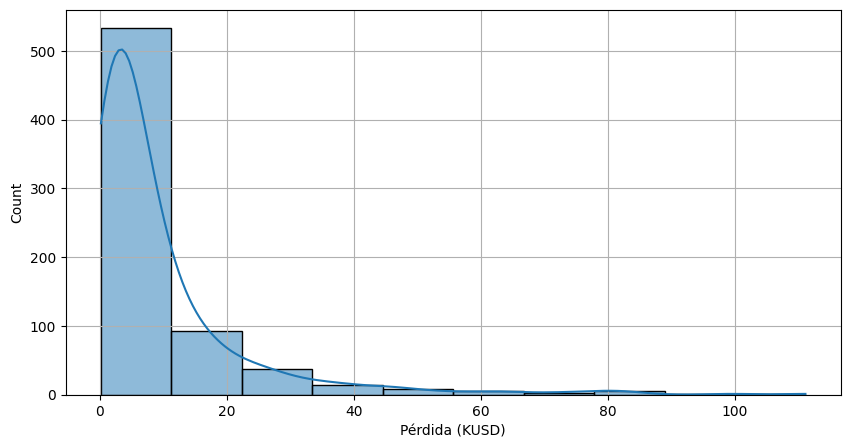

El número de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores:
[ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
Los intervalos superiores:
[ 11.23637  22.33044  33.42451  44.51858  55.61265  66.70672  77.80079
  88.89486  99.98893 111.083  ]
La media de los datos observados es: 11.07019634094151
El coeficiente de asimetría es: 3.5824155186772604
La desviación de los datos observados es: 13.044113210589247


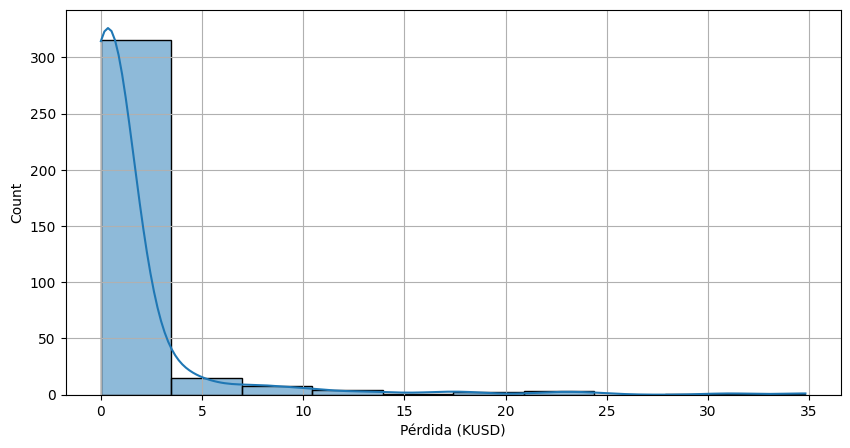

El número de datos por intervalo es:
[315  15   8   4   1   2   3   0   1   1]
Los intervalos inferiores:
[ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
Los intervalos superiores:
[ 3.48221562  6.96443124 10.44664686 13.92886248 17.4110781  20.89329372
 24.37550933 27.85772495 31.33994057 34.82215619]
La media de los datos externos es: 2.656433058055811
El coeficiente de asimetría es: 5.313307467317224
La desviación de los datos externos es: 3.6179492178130417


In [24]:
#3.1 Bases de Datos Observados
uo,sigmao,Caso,Kuo,dfo=caracterizacion(LDA)
print("La media de los datos observados es:", uo)
print("El coeficiente de asimetría es:", Caso)
print ("La desviación de los datos observados es:", sigmao)

#3.2 Bases de Datos Externas
ue,sigmae,Case,Kue,dfe=caracterizacion(LDAe)
print("La media de los datos externos es:", ue)
print("El coeficiente de asimetría es:", Case)
print ("La desviación de los datos externos es:", sigmae)

**4. Teoría de Credibilidad**

In [26]:
# 4.1 Media Hipótetica
NDo=len(LDA); NDe=len(LDAe) #Para saber la inercia de los datos
uhat=(NDo*uo+NDe*ue)/(NDo+NDe)

#4.2 EPV: Valor Esperado de la Varianza
EPV=(NDo*sigmao**2+NDe*sigmae**2)/(NDo+NDe) #Determinar la varianza conjunta de los datos

#4.3 VHM: Varianza Hipótetica de la Media
VHM=((NDo*uo**2+NDe*ue**2)/(NDo+NDe))-uhat**2

#4.4 Factor de Credibilidad
fc=(EPV/VHM)

#4.5 Credibilidad de la Base de Datos
Cr=1-(NDo/(NDo+fc)) #Significa
print("La credibilidad de la Base de Datos es:", Cr)

La credibilidad de la Base de Datos Observados es: 0.01057829191054338


**5. Parámetros de Riesgo**

In [17]:
#5.1 Pérdidas Asumibles (Media: Franquicia) : (Media Hipótetica de los Datos Integrados)
PEs=Cr*uo+(1-Cr)*ue
print("Se conoce como la franquicia de las pérdidas", PEs)

Se conoce como la franquicia de las pérdidas 2.745436302128388


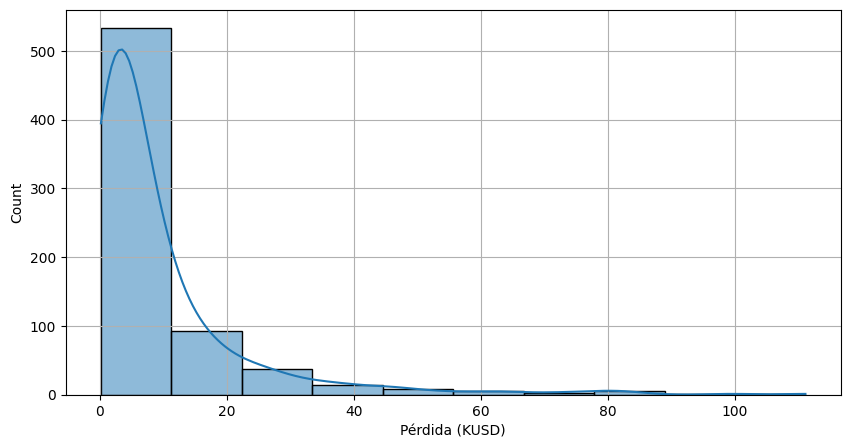

El número de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores:
[ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
Los intervalos superiores:
[ 11.23637  22.33044  33.42451  44.51858  55.61265  66.70672  77.80079
  88.89486  99.98893 111.083  ]


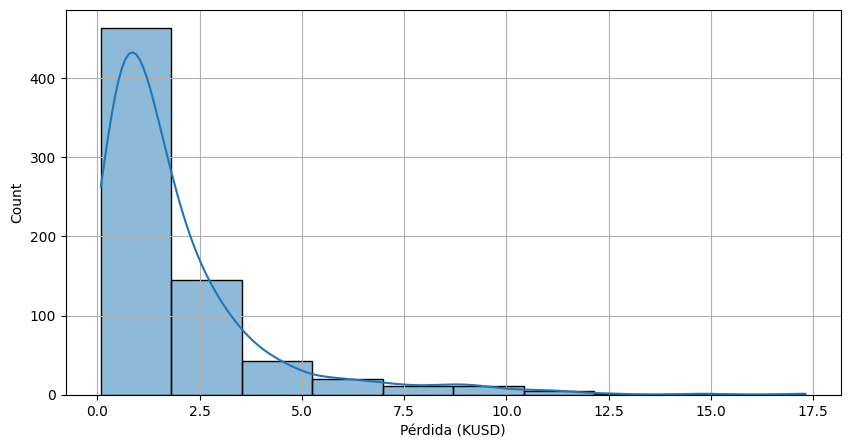

El número de datos por intervalo es:
[463 145  43  20  11  11   5   1   1   1]
Los intervalos inferiores:
[ 0.0842   1.80707  3.52994  5.25281  6.97568  8.69855 10.42142 12.14429
 13.86716 15.59003]
Los intervalos superiores:
[ 1.80707  3.52994  5.25281  6.97568  8.69855 10.42142 12.14429 13.86716
 15.59003 17.3129 ]


In [18]:
#Se procede con la estimación de las propiedades estadísticas
p1,p2,p3,p4,df=caracterizacion(LDA)

#Ahora se puede obtener las propiedades de la variable severidad
p1,p2,p3,p4,df=caracterizacion(Sev)

**6. Métricas Estadísticas de Tendencia Central y Dispersión**

Media, Desviación, Asimetría y Kurtosis

In [19]:
u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)

T2=np.column_stack((u,var,sigma))
df2=pd.DataFrame(T2,columns=['Media','Varianza','Desviación'])
df2.head(1)

from scipy.stats import skew, kurtosis

#Calculate Skewness
lda_skew=skew(LDA)

#Calculate Kurtosis
lda_kurtosis=kurtosis(LDA)

#Optionally, add to the DataFrame with other metrics
df2_temp = df2.copy()
df2_temp['Asimetria']=lda_skew
df2_temp['Kurtosis']=lda_kurtosis

display(df2_temp)

,Media,Varianza,Desviación,Asimetria,Kurtosis
0,9.451113,187.894776,13.707472,3.34836,14.167714


**Análisis de Credibilidad**

De acuerdo con las bases de datos, se observa una diferencia importante en las medias y en la desviación estándar (uo = 11.07; ue = 2.65 y sigmao = 13.04; sigmae = 3.62). Asimismo, el coeficiente de asimetría indica una diferencia notable en la acumulación de las pérdidas asociadas a las operaciones tecnológicas (Caso: 3.58; Case: 5.31). Debido a estas variaciones, el coeficiente de credibilidad fue cercano al 1%, lo que significa que solo una pequeña parte de los datos externos puede integrarse de forma confiable con los datos internos. Con base en esto, se estima que las pérdidas asumibles promedio que la Fintech podría considerar serían aproximadamente 2.75 millones de dólares.

**Análisis de Resultados**

Al revisar los datos internos y sus medidas de tendencia central, es posible observar que la mayoría de los valores tienden a ubicarse por debajo de la media. Esto se evidencia en el coeficiente de asimetría (3.34), el cual indica que las pérdidas generadas por fallos tecnológicos suelen ser bajas. Por otro lado, la curtosis (14.16) muestra que los datos están bastante concentrados hacia el lado izquierdo de la distribución, por lo que dichas pérdidas generalmente son mínimas y se encuentran dentro de lo esperado.